In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd

In [2]:
# read and compute data
labels=['WT','G303A','G303R']
rs={} # radial distance
zs={} # Z axis distance

for i,prot in enumerate(prots):
    data = np.genfromtxt('./{}_coords.dat'.format(prot),delimiter='',skip_header=2) 
    x,y,z = data[:,0],data[:,1],data[:,2]
    r = np.sqrt(x**2 + y**2)  # radial distance 
    
    rs[prot]=r
    zs[prot]=z


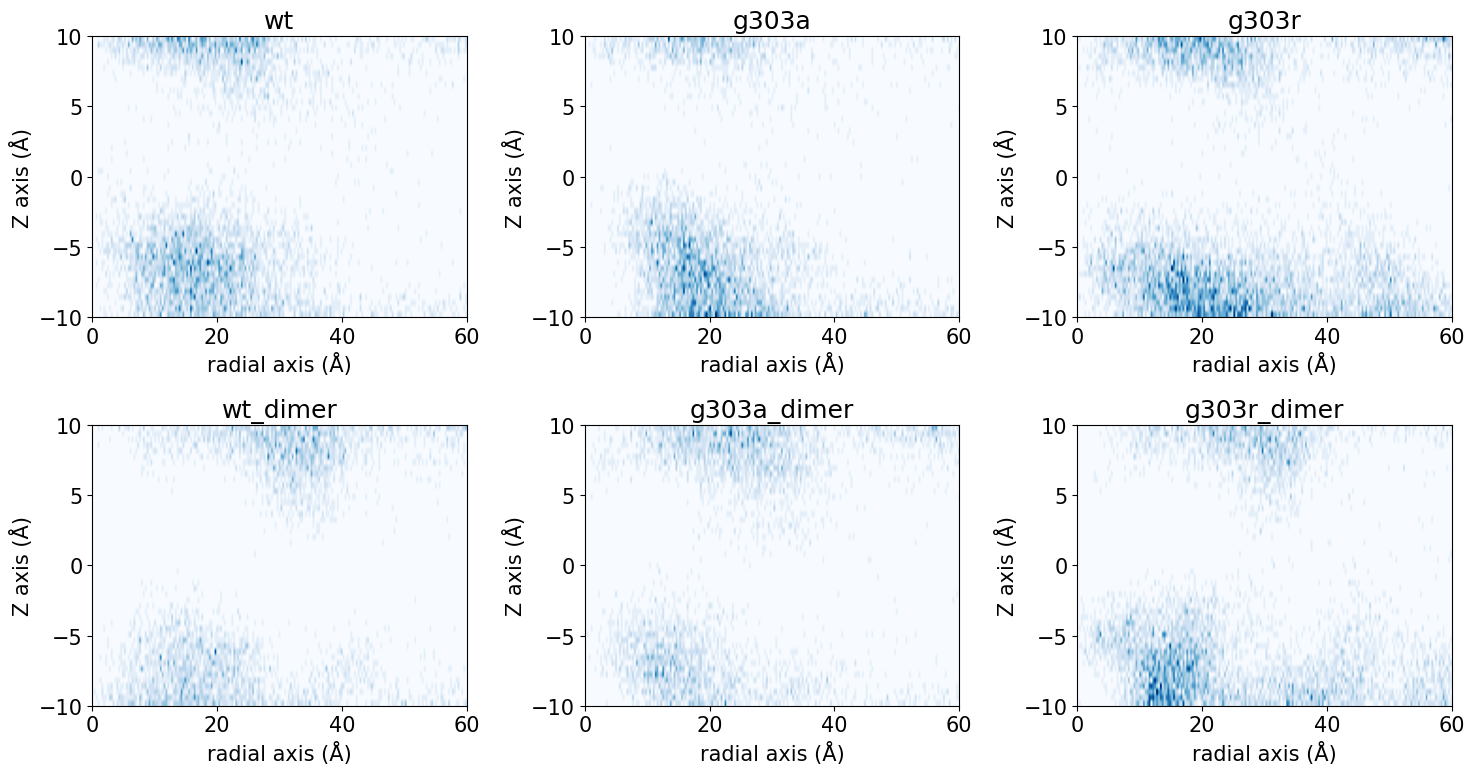

In [48]:
# Make 2D histogram of radial distance distribution against Z axis distance distribution
prots=['wt','g303a','g303r','wt_dimer','g303a_dimer','g303r_dimer']
rcParams['font.size']=15
fig=plt.figure(figsize=(15,8))
# range (in Å) within which wto visualize data along the radial and Z axes
r_lim=60 
z_lim=10

for i,prot in enumerate(prots):
    ax=fig.add_subplot(2,3,i+1)
    ax.set_title(prot)
    ax.set_ylabel('Z axis (Å)')
    ax.set_xlabel('radial axis (Å)')

    r=rs[prot]
    z=zs[prot]
    
    # Define bins for radial and axial histograms
    r_bins = np.linspace(0, r_lim, 200)  # Radial bins 
    z_bins = np.linspace(-z_lim, z_lim, 50)  # Axial bins 

    # 2D Histogram of Water Density
    hist, r_edges, z_edges = np.histogram2d(r, z, bins=[r_bins, z_bins])
    
    plt.imshow(hist.T, origin="lower", aspect="auto", extent=[0, r_lim, -z_lim, z_lim], cmap="Blues",vmax=10.0)
    
plt.tight_layout()

wt 2137.7551020408164
g303a 1906.734693877551
g303r 2956.734693877551


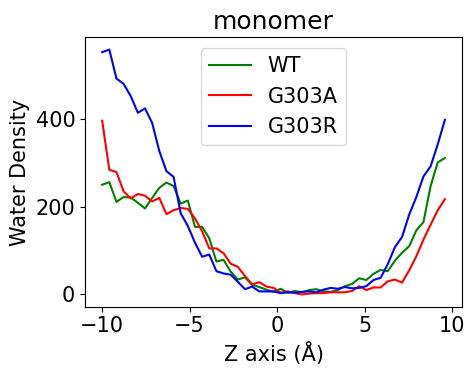

In [42]:
# threshold of range (in Å) within which to compute water density
# We select 30 Å as this is the range in which the protein moved laterally in the bilayer during the simulations
r_thresh=30

rcParams['font.size']=15
fig=plt.figure(figsize=(5,4))

prots=['wt','g303a','g303r']
cols=['green','red','blue']
ax=fig.add_subplot(111)
ax.set_xlabel('Z axis (Å)')
ax.set_ylabel('Water Density')
ax.set_title('monomer')
    
for i,prot in enumerate(prots):
    r=rs[prot]
    z=zs[prot]
    
    # Define bins for radial and axial histograms
    r_bins = np.linspace(0, r_lim, 200)  # Radial bins 
    z_bins = np.linspace(-z_lim, z_lim, 50)  # Axial bins 

    # 2D Histogram of Water Density
    hist, r_edges, z_edges = np.histogram2d(r, z, bins=[r_bins, z_bins])
    
    # Sum over radial axis under a thresholded range
    r_indices = np.where(r_edges[:-1] < r_thresh)[0] 

    # Sum along the selected radial indices
    hist_1d = hist[r_indices, :].sum(axis=0)  
    
    # Calculate AUC
    auc = np.trapz(hist_1d, z_edges[:-1])  
    print(prot, auc)

    # Plot the 1D histogram
    plt.plot(z_edges[:-1], hist_1d, color=cols[i], label=labels[i])

plt.legend() 
plt.tight_layout()

wt_dimer 1469.1836734693877
g303a_dimer 1533.673469387755
g303r_dimer 2344.8979591836733


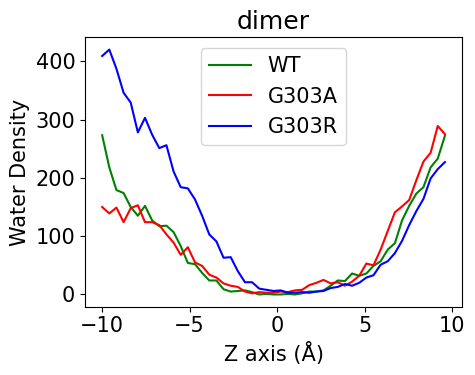

In [57]:
rcParams['font.size']=15
fig=plt.figure(figsize=(5,4))

prots=['wt_dimer','g303a_dimer','g303r_dimer']
cols=['green','red','blue']
ax=fig.add_subplot(111)
ax.set_xlabel('Z axis (Å)')
ax.set_ylabel('Water Density')
ax.set_title('dimer')
    
for i,prot in enumerate(prots):
    r=rs[prot]
    z=zs[prot]
    
    # Define bins for radial and axial histograms
    r_bins = np.linspace(0, r_lim, 200)  # Radial bins 
    z_bins = np.linspace(-z_lim, z_lim, 50)  # Axial bins 

    # 2D Histogram of Water Density
    hist, r_edges, z_edges = np.histogram2d(r, z, bins=[r_bins, z_bins])
    
    # Sum over radial axis under a thresholded range
    r_indices = np.where(r_edges[:-1] < r_thresh)[0] 

    # Sum along the selected radial indices
    hist_1d = hist[r_indices, :].sum(axis=0)  
    
    # Calculate AUC
    auc = np.trapz(hist_1d, z_edges[:-1])  
    print(prot, auc)

    # Plot the 1D histogram
    plt.plot(z_edges[:-1], hist_1d, color=cols[i], label=labels[i])

plt.legend() 
plt.tight_layout()

In [75]:
# output data into CSV format
df=pd.DataFrame(output)
df.to_csv('water_density.csv',index=False,sep=' ') 
df

wt Z  wt density    g303a Z  g303a density    g303r Z  g303r density  \
0  -10.000000       250.0 -10.000000          396.0 -10.000000          552.0   
1   -9.591837       256.0  -9.591837          284.0  -9.591837          558.0   
2   -9.183673       211.0  -9.183673          279.0  -9.183673          492.0   
3   -8.775510       222.0  -8.775510          235.0  -8.775510          480.0   
4   -8.367347       221.0  -8.367347          219.0  -8.367347          452.0   
5   -7.959184       209.0  -7.959184          229.0  -7.959184          414.0   
6   -7.551020       196.0  -7.551020          225.0  -7.551020          424.0   
7   -7.142857       220.0  -7.142857          212.0  -7.142857          391.0   
8   -6.734694       243.0  -6.734694          220.0  -6.734694          327.0   
9   -6.326531       255.0  -6.326531          183.0  -6.326531          281.0   
10  -5.918367       247.0  -5.918367          192.0  -5.918367          268.0   
11  -5.510204       207.0  -5.510204          197.0  -5.510204          185.0   
12  -5.102041       214.0  -5.102041          195.0  -5.102041          156.0   
13  -4.693878       154.0  -4.693878          173.0  -4.693878          118.0   
14  -4.285714       154.0  -4.285714          144.0  -4.285714           86.0   
15  -3.877551       128.0  -3.877551          105.0  -3.877551           91.0   
16  -3.469388        75.0  -3.469388          105.0  -3.469388           53.0   
17  -3.061224        79.0  -3.061224           94.0  -3.061224           48.0   
18  -2.653061        52.0  -2.653061           70.0  -2.653061           45.0   
19  -2.244898        34.0  -2.244898           63.0  -2.244898           29.0   
20  -1.836735        39.0  -1.836735           42.0  -1.836735           12.0   
21  -1.428571        22.0  -1.428571           23.0  -1.428571           18.0   
22  -1.020408        17.0  -1.020408           28.0  -1.020408            7.0   
23  -0.612245        11.0  -0.612245           18.0  -0.612245            7.0   
24  -0.204082         6.0  -0.204082           15.0  -0.204082            7.0   
25   0.204082        13.0   0.204082            4.0   0.204082            3.0   
26   0.612245         4.0   0.612245            7.0   0.612245            5.0   
27   1.020408         8.0   1.020408            3.0   1.020408            4.0   
28   1.428571         5.0   1.428571            0.0   1.428571            6.0   
29   1.836735        10.0   1.836735            2.0   1.836735            7.0   
30   2.244898        12.0   2.244898            3.0   2.244898            5.0   
31   2.653061         7.0   2.653061            3.0   2.653061           11.0   
32   3.061224         6.0   3.061224            5.0   3.061224           15.0   
33   3.469388        10.0   3.469388            5.0   3.469388           13.0   
34   3.877551        19.0   3.877551            5.0   3.877551           17.0   
35   4.285714        24.0   4.285714            8.0   4.285714           14.0   
36   4.693878        37.0   4.693878           19.0   4.693878           15.0   
37   5.102041        33.0   5.102041           10.0   5.102041           19.0   
38   5.510204        47.0   5.510204           16.0   5.510204           33.0   
39   5.918367        56.0   5.918367           16.0   5.918367           38.0   
40   6.326531        53.0   6.326531           30.0   6.326531           69.0   
41   6.734694        77.0   6.734694           34.0   6.734694          108.0   
42   7.142857        95.0   7.142857           27.0   7.142857          131.0   
43   7.551020       110.0   7.551020           55.0   7.551020          182.0   
44   7.959184       146.0   7.959184           87.0   7.959184          222.0   
45   8.367347       165.0   8.367347          125.0   8.367347          269.0   
46   8.775510       247.0   8.775510          159.0   8.775510          292.0   
47   9.183673       301.0   9.183673          192.0   9.183673          342.0   
48   9.591837       311.0   9.591837    